#### Produce an AR model from a series
1. Create a time series based on previous 2 values plus noise
2. Build the model
3. Compare the model parameters to actual
4. Plot actual vs fitted values
5. Plot residuals
6. Make a prediction on the next value
7. Compare prediction to actual (minus noise)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import pacf

##### Generate a time series with some Trend; see if we can detect it

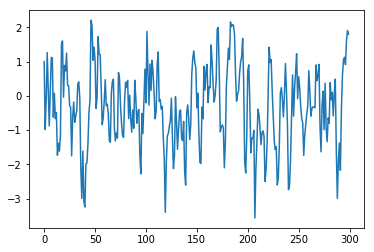

In [4]:
size=300
noise = np.random.normal(size=size,scale=.8)
init = 1.0
B1   = 0.85      # This has to be less than 1 or the series will explode
B2   = -0.2

series = [init]
for x in range(1,size):
    tmp = series[x-1]*B1 + series[x-2]*B2 + noise[x]
    series.append(tmp)

plt.plot(series)
plt.show()

In [7]:
tom = pacf(series, nlags=10, method='ywunbiased', alpha=None)

In [9]:
tom

array([ 1.        ,  0.68334562, -0.15967232,  0.0228107 , -0.03301573,
       -0.04024105, -0.07726409, -0.01896893,  0.02801406,  0.04318057,
        0.01859548])

In [16]:
model = AR(train)
model = model.fit(maxlag=5, ic="bic")         # Try different "ic" methods

In [17]:
#print(model.__doc__)

In [18]:
lag      = model.k_ar
constant = model.params[0]
slope1   = model.params[1]
slope2   = model.params[2]
print("Optimum lag is {}".format(lag))
print ("Formula looks like:")
print("Y = {:.4f} + {:.4f}*(T-1) + {:.4f}*(T-2)".format(constant,slope1,slope2))

Optimum lag is 2
Formula looks like:
Y = 0.0102 + 0.8320*(T-1) + -0.2020*(T-2)


##### See how close the fitted slope matches the actual slope

In [19]:
print("Fitted coefficients are {:.2%} of B1 and {:.2%} of B2".
      format(slope1/B1, slope2/B2))

Fitted coefficients are 97.88% of B1 and 100.98% of B2


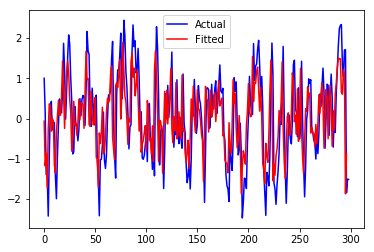

In [20]:
plt.plot(train,'b', label="Actual")
plt.plot(model.fittedvalues,'r', label="Fitted")
plt.legend(loc='best')
plt.show()

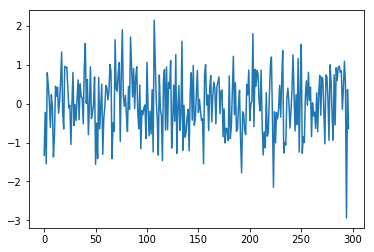

In [21]:
plt.plot(model.resid)
plt.show()

#### Predict the last value

In [22]:
# "prev" is the last few entries in the training data...enough to generate the
# first prediction
def getPreds(prev, model):
    constant = model.params[0]
    b1 = model.params[1]
    b2 = model.params[2]
    return constant + b1*prev[1] + b2*prev[0]

In [23]:
prev = train[-2:]   # These are the 2 actuals used to predict the next value
prediction = getPreds(prev, model)

In [24]:
print("Prediction is {:.4f}".format(prediction))
print("Test value is {:.4f}".format(test))
total = prediction + noise[299]
print("Prediction + error term is {:.4f}".format(total))
accuracy = test/total
print("So including the error term the prediction was {:.2%} accurate".format(accuracy))

Prediction is -0.9446
Test value is -1.5591
Prediction + error term is -1.5186
So including the error term the prediction was 102.66% accurate
